In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2477,2023-06-01 00:00:00,php,1937
2478,2023-06-01 00:00:00,python,11455
2479,2023-06-01 00:00:00,r,2685
2480,2023-06-01 00:00:00,ruby,228


In [22]:
df.DATE = pd.to_datetime(df.DATE)
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164
...,...,...,...
2477,2023-06-01,php,1937
2478,2023-06-01,python,11455
2479,2023-06-01,r,2685
2480,2023-06-01,ruby,228


In [26]:
df_pivot = df.pivot(index='DATE', columns='TAG', values='POSTS')
df_pivot.fillna(0, inplace=True)
df_pivot

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1641.0,754.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,302.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,610.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,956.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,188.0,1309.0,4763.0,2219.0,133.0,659.0,5189.0,10449.0,79.0,2427.0,15717.0,3803.0,340.0,1296.0
2023-03-01,180.0,1265.0,4910.0,2572.0,143.0,639.0,5538.0,10541.0,95.0,2282.0,15565.0,3832.0,301.0,1367.0
2023-04-01,197.0,1190.0,3850.0,1967.0,121.0,516.0,4498.0,8317.0,56.0,1944.0,12447.0,3107.0,220.0,1098.0


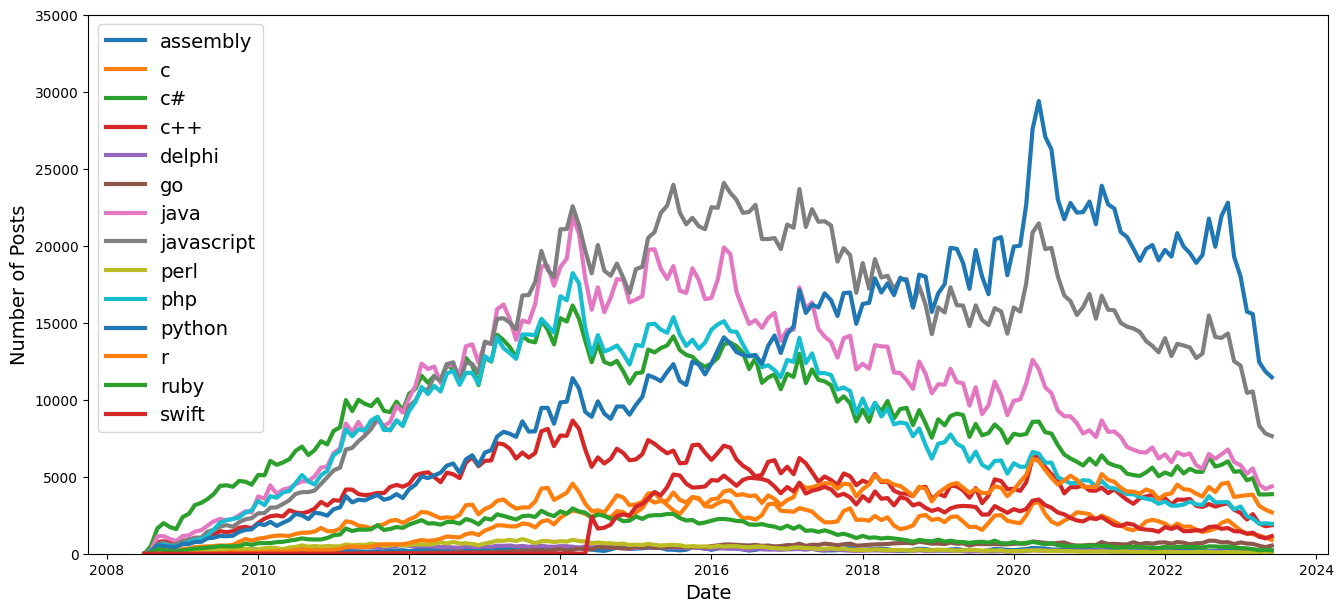

In [48]:
plt.figure(figsize=(16,7))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], linewidth=3, label=df_pivot[column].name)

plt.legend(fontsize=14)

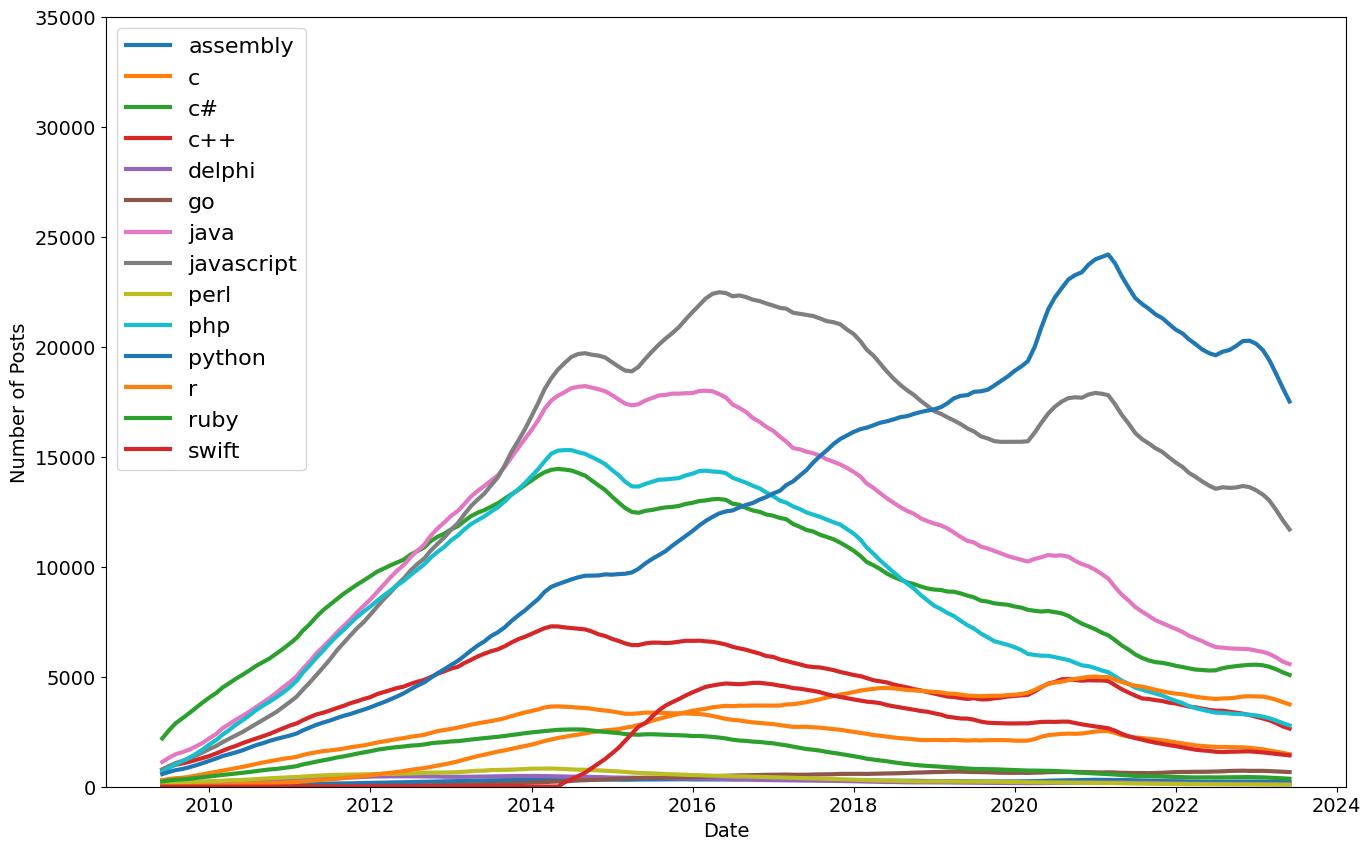

In [52]:
roll_df = df_pivot.rolling(window=12).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)